In [52]:
import numpy as np
import pandas
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [67]:
infile = open('all_jets_train_4D_100_percent.pkl','rb')
traindata = pickle.load(infile)
infile.close()

In [68]:
infile = open('all_jets_test_4D_100_percent.pkl','rb')
testdata = pickle.load(infile)
infile.close()

In [69]:
train_data = traindata
test_data = testdata

In [56]:
traindata.head()

,m,pt,phi,eta
132784,3831.839355,22000.609375,1.567018,1.142924
99666,4582.417480,21648.210938,-2.680558,0.213654
26629,16747.765625,169514.281250,-1.948239,1.163296
80473,14789.586914,183085.609375,-1.641102,2.670927
48229,4646.724121,20527.130859,2.922270,-1.158871


In [57]:
traindata.describe()

,m,pt,phi,eta
count,111778.000000,111778.000000,111778.000000,111778.000000
mean,8941.356799,64458.683471,0.001691,0.043500
std,7421.270111,69874.993026,1.803151,1.448439
min,-0.045353,20000.154297,-3.141587,-4.745398
25%,4658.248535,22514.718750,-1.558285,-1.139831
50%,5728.732910,27141.585938,0.019362,0.086258
75%,10467.514160,78976.080078,1.553306,1.178913
max,128247.671875,748795.937500,3.141546,4.747644


In [58]:
testdata.head()

,m,pt,phi,eta
85972,4983.729980,23798.070312,1.962157,-0.059532
38742,5435.273438,21881.867188,1.035412,0.734343
128711,5239.408691,24608.134766,-1.121055,0.828848
28751,14121.240234,203110.953125,0.324205,-2.571108
131358,3344.826660,24897.294922,0.395331,1.440069


In [59]:
testdata.describe()

,m,pt,phi,eta
count,27945.000000,27945.000000,27945.000000,27945.000000
mean,8953.467169,65082.072456,0.007022,0.040346
std,7484.942144,71586.689016,1.813966,1.439198
min,-0.045315,20000.074219,-3.141492,-4.782808
25%,4662.796387,22493.634766,-1.566266,-1.134387
50%,5711.495117,27151.828125,0.028218,0.070660
75%,10511.995117,79948.820312,1.571245,1.176707
max,114533.429688,786146.937500,3.141527,4.658744


In [60]:
def plotdata(data, logy=False):
    plt.figure()
    plt.hist(data['m'], bins=100)
    plt.xlabel('m')
    plt.ylabel('No of jets')
    if logy:
        plt.yscale('log')
    
    plt.figure()
    plt.hist(data['pt'], bins=100)
    plt.xlabel('pt')
    plt.ylabel('No of jets')
    if logy:
        plt.yscale('log')
    
    plt.figure()
    plt.hist(data['phi'], bins=100)
    plt.xlabel('phi')
    plt.ylabel('No of jets')
    if logy:
        plt.yscale('log')
    
    plt.figure()
    plt.hist(data['eta'], bins=100)
    plt.xlabel('eta')
    plt.ylabel('No of jets')
    if logy:
        plt.yscale('log')

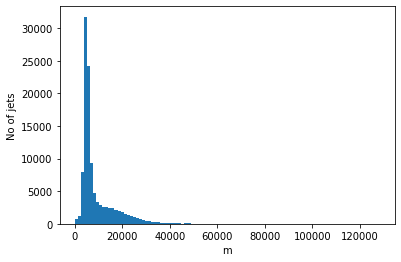

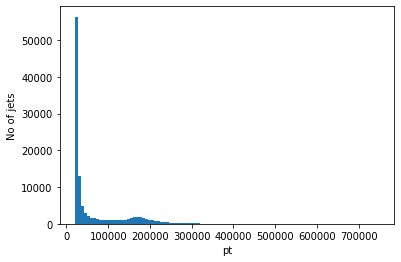

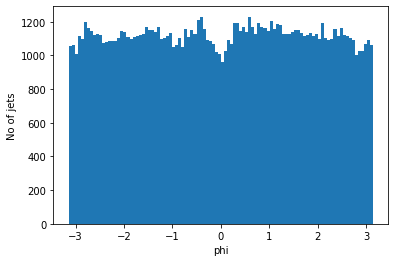

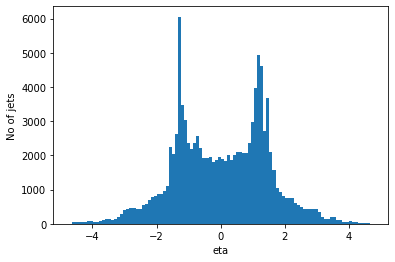

In [61]:
plotdata(traindata, logy=False)

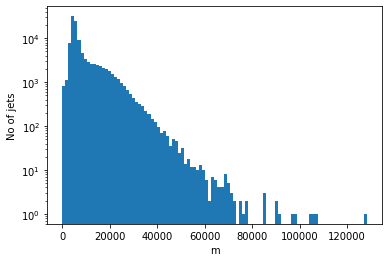

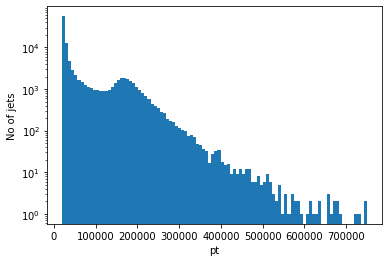

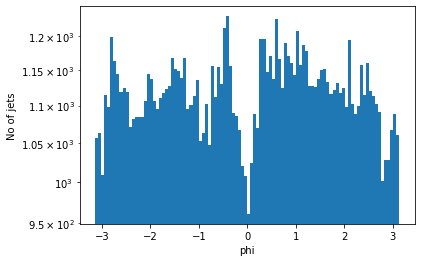

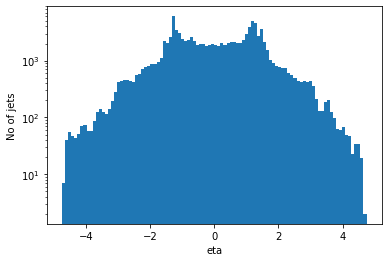

In [62]:
plotdata(traindata, logy=True)

In [63]:
train_mean =  traindata.mean()
train_std = traindata.std()

traindata = (traindata-train_mean)/train_std

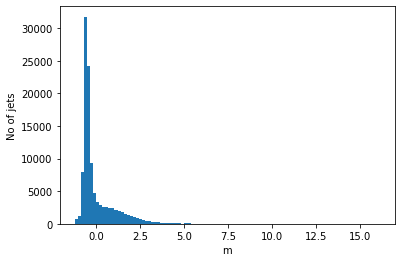

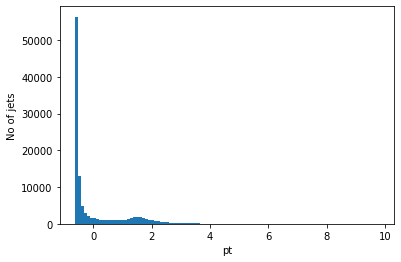

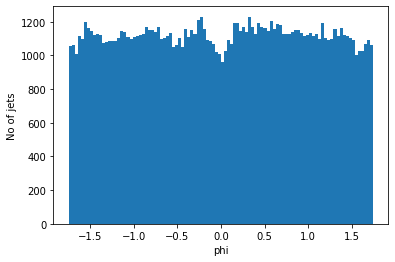

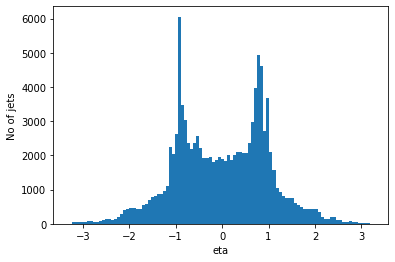

In [64]:
plotdata(traindata)

In [70]:
#Let try some custom normalization

In [71]:
#After reloading the dataset again-
print(traindata['m'][traindata['m']<0.0].count())

127


In [73]:
#after seeing the data plot of m I believe log10 operation will be useful. So to make this possible I will apply log10(m+1) instead

In [74]:
print(traindata['pt'][traindata['pt']<0.0].count())

0


In [75]:
train_data['m']=np.log10(train_data['m']+1)
train_data['pt']=np.log10(train_data['pt'])
train_data['eta'] = train_data['eta']/3 # ~max value of eta
train_data['phi'] = train_data['phi']/5 # ~max value of phi

In [76]:
train_data.describe()

,m,pt,phi,eta
count,111778.000000,111778.000000,111778.000000,111778.000000
mean,3.832283,4.627400,0.000338,0.014500
std,0.399387,0.363469,0.360630,0.482813
min,-0.020157,4.301033,-0.628317,-1.581799
25%,3.668316,4.352467,-0.311657,-0.379944
50%,3.758134,4.433635,0.003872,0.028753
75%,4.019885,4.897496,0.310661,0.392971
max,5.108053,5.874363,0.628309,1.582548


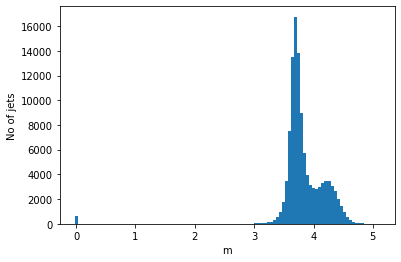

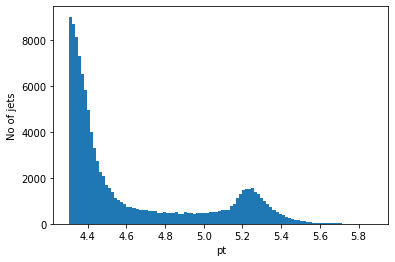

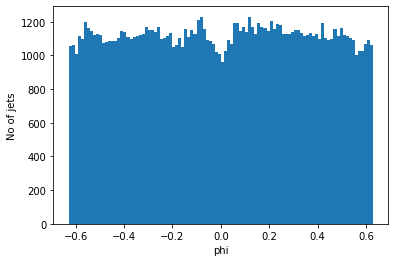

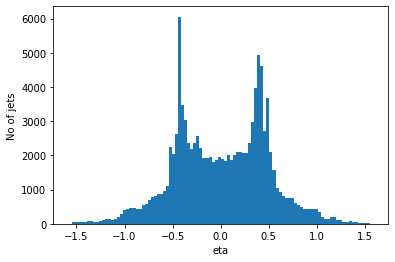

In [77]:
plotdata(train_data)

In [47]:
#Now I'll try to bring the mean and std of m and pt to 0 and 1 respectively

In [78]:
train_data['m'] = (train_data['m'] - train_data['m'].mean())
train_data['pt'] = (train_data['pt'] - train_data['pt'].mean())

In [79]:
train_data.describe()

,m,pt,phi,eta
count,1.117780e+05,1.117780e+05,111778.000000,111778.000000
mean,-4.464468e-14,1.695266e-14,0.000338,0.014500
std,3.993873e-01,3.634688e-01,0.360630,0.482813
min,-3.852441e+00,-3.263670e-01,-0.628317,-1.581799
25%,-1.639675e-01,-2.749338e-01,-0.311657,-0.379944
50%,-7.414897e-02,-1.937651e-01,0.003872,0.028753
75%,1.876017e-01,2.700952e-01,0.310661,0.392971
max,1.275770e+00,1.246963e+00,0.628309,1.582548


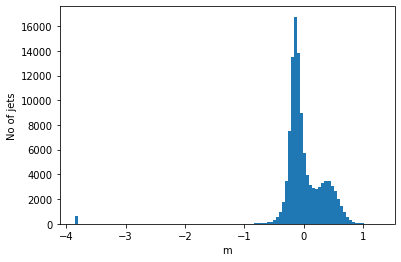

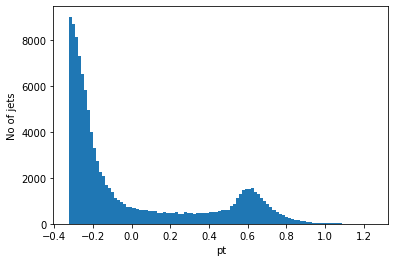

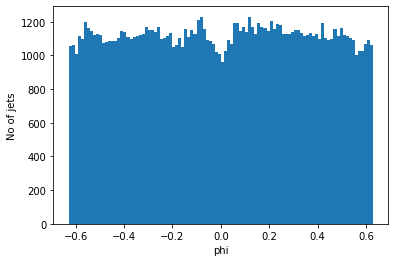

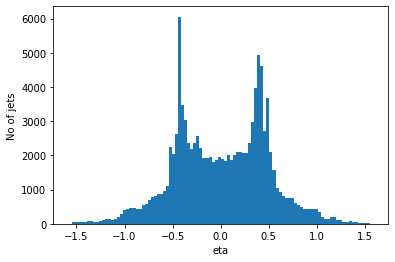

In [80]:
plotdata(train_data)

In [81]:
#A final check
train_data.isnull().any()

m      False
pt     False
phi    False
eta    False
dtype: bool